## Assignment 5: Data Science Revision
### Stefan Dimitrov Velev, 0MI3400521, Big Data Technologies
### Faculty of Mathematics and Informatics, Sofia University

### Task 1: In this question you will work with data sets from *Our World In Data* and Python to produce thoughtful analyses and interesting visualisations

#### 1. Import required Python packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### 2. Read the CSV files

**2.1 Self-reported life satisfaction**

*Data sources: World Happiness Report (2012-2024); Wellbeing Research Centre (2024); Population based on various sources (2023)*

https://ourworldindata.org/grapher/happiness-cantril-ladder?time=latest

In [2]:
df_life_satisfaction = pd.read_csv('./data/happiness-cantril-ladder.csv')

In [3]:
df_life_satisfaction.head()

,Entity,Code,Year,Cantril ladder score
0,Afghanistan,AFG,2011,4.25835
1,Afghanistan,AFG,2014,3.57500
2,Afghanistan,AFG,2015,3.36000
3,Afghanistan,AFG,2016,3.79400
4,Afghanistan,AFG,2017,3.63150


In [4]:
print("The number of rows in the life satisfaction data frame is:", len(df_life_satisfaction))

The number of rows in the life satisfaction data frame is: 1787


**2.2 Share in extreme poverty vs. life expectancy**

*Data sources: UN, World Population Prospects (2024); World Bank Poverty and Inequality Platform (2024); HYDE (2023); Gapminder - Population v7 (2022); Gapminder - Systema Globalis (2022)*

https://ourworldindata.org/grapher/extreme-poverty-headcount-ratio-vs-life-expectancy-at-birth

In [5]:
df_extreme_poverty_life_expectancy = pd.read_csv('./data/extreme-poverty-headcount-ratio-vs-life-expectancy-at-birth.csv')

In [6]:
df_extreme_poverty_life_expectancy.head()

,Entity,Code,Year,Life expectancy - Sex: all - Age: 0 - Variant: estimates,$2.15 a day - Share of population in poverty,990305-annotations,Population (historical),World regions according to OWID
0,Afghanistan,AFG,1950,28.156,NaN,NaN,7776182.0,NaN
1,Afghanistan,AFG,1951,28.584,NaN,NaN,7879343.0,NaN
2,Afghanistan,AFG,1952,29.014,NaN,NaN,7987783.0,NaN
3,Afghanistan,AFG,1953,29.452,NaN,NaN,8096703.0,NaN
4,Afghanistan,AFG,1954,29.698,NaN,NaN,8207953.0,NaN


In [7]:
print("The number of rows in the extreme poverty vs. life expectancy data frame is:", len(df_extreme_poverty_life_expectancy))

The number of rows in the extreme poverty vs. life expectancy data frame is: 60100


**2.3 Political corruption index**

*Data source: V-Dem (2024)*

https://ourworldindata.org/grapher/political-corruption-index

In [8]:
df_political_corruption = pd.read_csv('./data/political-corruption-index.csv')

In [9]:
df_political_corruption.head()

,Entity,Code,Year,"Political corruption index (best estimate, aggregate: average)"
0,Afghanistan,AFG,1789,0.438
1,Afghanistan,AFG,1790,0.438
2,Afghanistan,AFG,1791,0.438
3,Afghanistan,AFG,1792,0.438
4,Afghanistan,AFG,1793,0.438


In [10]:
print("The number of rows in the political corruption data frame is:", len(df_political_corruption))

The number of rows in the political corruption data frame is: 33090


#### 3. Data  Cleaning

**3.1 Self-reported life satisfaction**

In [11]:
# Remove the unnecessary columns in the data frame
df_life_satisfaction = df_life_satisfaction[['Entity', 'Year', 'Cantril ladder score']]

In [12]:
# Rename the applicable columns
df_life_satisfaction = df_life_satisfaction.rename(columns={'Entity': 'Country'})

In [13]:
# Leaving only rows for year 2021
df_life_satisfaction = df_life_satisfaction[df_life_satisfaction['Year'] == 2021]

In [14]:
# Remove rows with missing values
df_life_satisfaction = df_life_satisfaction.dropna()

In [15]:
df_life_satisfaction

,Country,Year,Cantril ladder score
8,Afghanistan,2021,2.403800
19,Africa,2021,4.517288
30,Albania,2021,5.198800
41,Algeria,2021,5.122300
57,Argentina,2021,5.967000
...,...,...,...
1741,Vietnam,2021,5.485000
1752,World,2021,5.184147
1763,Yemen,2021,4.196900
1773,Zambia,2021,3.759800


In [16]:
# Remove not-country-specific entries
df_life_satisfaction = df_life_satisfaction[df_life_satisfaction['Country'] != 'High-income countries']
df_life_satisfaction = df_life_satisfaction[df_life_satisfaction['Country'] != 'Low-income countries']
df_life_satisfaction = df_life_satisfaction[df_life_satisfaction['Country'] != 'Lower-middle-income countries']
df_life_satisfaction = df_life_satisfaction[df_life_satisfaction['Country'] != 'Upper-middle-income countries']
df_life_satisfaction = df_life_satisfaction[df_life_satisfaction['Country'] != 'World']

In [17]:
df_life_satisfaction

,Country,Year,Cantril ladder score
8,Afghanistan,2021,2.403800
19,Africa,2021,4.517288
30,Albania,2021,5.198800
41,Algeria,2021,5.122300
57,Argentina,2021,5.967000
...,...,...,...
1730,Venezuela,2021,4.925500
1741,Vietnam,2021,5.485000
1763,Yemen,2021,4.196900
1773,Zambia,2021,3.759800


**3.2 Share in extreme poverty vs. life expectancy**

In [18]:
# Remove the unnecessary columns in the data frame
df_extreme_poverty_life_expectancy = df_extreme_poverty_life_expectancy[['Entity', 'Year', 'Life expectancy - Sex: all - Age: 0 - Variant: estimates', '$2.15 a day - Share of population in poverty', 'Population (historical)']]

In [19]:
# Rename the applicable columns
df_extreme_poverty_life_expectancy = df_extreme_poverty_life_expectancy.rename(columns={'Entity': 'Country', 'Life expectancy - Sex: all - Age: 0 - Variant: estimates': 'Life expectancy', '$2.15 a day - Share of population in poverty': 'Share in extreme poverty', 'Population (historical)': 'Population'})

In [20]:
# Leaving only rows for year 2021
df_extreme_poverty_life_expectancy = df_extreme_poverty_life_expectancy[df_extreme_poverty_life_expectancy['Year'] == 2021]

In [21]:
# Remove rows with missing values
df_extreme_poverty_life_expectancy = df_extreme_poverty_life_expectancy.dropna()

In [22]:
df_extreme_poverty_life_expectancy

,Country,Year,Life expectancy,Share in extreme poverty,Population
2588,Armenia,2021,72.552,0.523521,2.870339e+06
3683,Austria,2021,81.820,0.485822,8.967053e+06
5502,Belgium,2021,81.659,0.029965,1.157084e+07
6024,Benin,2021,59.610,12.723279,1.341342e+07
6636,Bolivia,2021,61.427,1.964501,1.193737e+07
...,...,...,...,...,...
54536,Turkey,2021,75.722,0.442865,8.668626e+07
56400,United Kingdom,2021,80.708,0.245101,6.766879e+07
56661,United States,2021,76.384,0.248719,3.401614e+08
57298,Uruguay,2021,75.434,0.112155,3.396692e+06


In [23]:
# Remove not-country-specific entries
df_extreme_poverty_life_expectancy = df_extreme_poverty_life_expectancy[df_extreme_poverty_life_expectancy['Country'] != 'World']

In [24]:
df_extreme_poverty_life_expectancy

,Country,Year,Life expectancy,Share in extreme poverty,Population
2588,Armenia,2021,72.552,0.523521,2870339.0
3683,Austria,2021,81.820,0.485822,8967053.0
5502,Belgium,2021,81.659,0.029965,11570842.0
6024,Benin,2021,59.610,12.723279,13413423.0
6636,Bolivia,2021,61.427,1.964501,11937369.0
...,...,...,...,...,...
54275,Tunisia,2021,72.893,0.273734,12048625.0
54536,Turkey,2021,75.722,0.442865,86686255.0
56400,United Kingdom,2021,80.708,0.245101,67668789.0
56661,United States,2021,76.384,0.248719,340161441.0


In [25]:
df_extreme_poverty_life_expectancy.describe()

,Year,Life expectancy,Share in extreme poverty,Population
count,70.0,70.000000,70.000000,7.000000e+01
mean,2021.0,73.067557,5.409042,7.159597e+07
std,0.0,8.103193,11.956552,2.401526e+08
min,2021.0,40.279000,0.000000,1.055040e+05
25%,2021.0,69.136250,0.102991,5.073020e+06
50%,2021.0,73.770500,0.543886,1.085152e+07
75%,2021.0,80.506750,3.401814,3.400077e+07
max,2021.0,83.852000,65.666510,1.426437e+09


In [26]:
df_extreme_poverty_life_expectancy[df_extreme_poverty_life_expectancy['Country'] == 'Central African Republic']

,Country,Year,Life expectancy,Share in extreme poverty,Population
9982,Central African Republic,2021,40.279,65.66651,5112102.0


In [27]:
# Correct the Central African Republic life expectancy according the World Health Organization Data for 2021
# Source: https://data.who.int/countries/140
df_extreme_poverty_life_expectancy.loc[df_extreme_poverty_life_expectancy['Country'] == 'Central African Republic', 'Life expectancy'] = 52.31

**3.3 Political corruption index**

In [28]:
# Remove the unnecessary columns in the data frame
df_political_corruption = df_political_corruption[['Entity', 'Year', 'Political corruption index (best estimate, aggregate: average)']]

In [29]:
# Rename the applicable columns
df_political_corruption = df_political_corruption.rename(columns={'Entity': 'Country', 'Political corruption index (best estimate, aggregate: average)': 'Political corruption index'})

In [30]:
# Leaving only rows for year 2021
df_political_corruption = df_political_corruption[df_political_corruption['Year'] == 2021]

In [31]:
# Remove rows with missing values
df_political_corruption = df_political_corruption.dropna()

In [32]:
df_political_corruption

,Country,Year,Political corruption index
232,Afghanistan,2021,0.397000
467,Africa,2021,0.624089
579,Albania,2021,0.609000
703,Algeria,2021,0.693000
827,Angola,2021,0.510000
...,...,...,...
32273,World,2021,0.483179
32518,Yemen,2021,0.936000
32795,Zambia,2021,0.440000
32963,Zanzibar,2021,0.715000


In [33]:
# Remove not-country-specific entries
df_political_corruption = df_political_corruption[df_political_corruption['Country'] != 'World']

In [34]:
df_political_corruption

,Country,Year,Political corruption index
232,Afghanistan,2021,0.397000
467,Africa,2021,0.624089
579,Albania,2021,0.609000
703,Algeria,2021,0.693000
827,Angola,2021,0.510000
...,...,...,...
31996,Vietnam,2021,0.484000
32518,Yemen,2021,0.936000
32795,Zambia,2021,0.440000
32963,Zanzibar,2021,0.715000


#### 4. Data  Segregation


In [35]:
continents = ['Africa', 'Asia', 'Australia', 'Europe', 'North America', 'South America']

**4.1 Self-reported life satisfaction**

In [36]:
# Extract data only for continents
df_life_satisfaction_continents = df_life_satisfaction[df_life_satisfaction['Country'].isin(continents)]

In [37]:
df_life_satisfaction_continents

,Country,Year,Cantril ladder score
19,Africa,2021,4.517288
79,Asia,2021,4.892916
90,Australia,2021,7.162100
511,Europe,2021,6.338868
1190,North America,2021,6.692469
1465,South America,2021,5.985671


In [38]:
# Remove continent entries in the original data frame
df_life_satisfaction = df_life_satisfaction[(~df_life_satisfaction['Country'].isin(continents)) | (df_life_satisfaction['Country'] == 'Australia')]

In [39]:
df_life_satisfaction

,Country,Year,Cantril ladder score
8,Afghanistan,2021,2.4038
30,Albania,2021,5.1988
41,Algeria,2021,5.1223
57,Argentina,2021,5.9670
68,Armenia,2021,5.3986
...,...,...,...
1730,Venezuela,2021,4.9255
1741,Vietnam,2021,5.4850
1763,Yemen,2021,4.1969
1773,Zambia,2021,3.7598


In [40]:
df_life_satisfaction.count()

Country                 147
Year                    147
Cantril ladder score    147
dtype: int64

**4.2 Political corruption index**

In [41]:
# Extract data only for continents
df_political_corruption_continents = df_political_corruption[df_political_corruption['Country'].isin(continents)]

In [42]:
df_political_corruption_continents

,Country,Year,Political corruption index
467,Africa,2021,0.624089
1403,Asia,2021,0.555878
1638,Australia,2021,0.031000
9709,Europe,2021,0.235659
20953,North America,2021,0.458667
26875,South America,2021,0.472500


In [43]:
# Remove continent entries in the original data frame
df_political_corruption = df_political_corruption[(~df_political_corruption['Country'].isin(continents)) | (df_political_corruption['Country'] == 'Australia')]

In [44]:
df_political_corruption

,Country,Year,Political corruption index
232,Afghanistan,2021,0.397
579,Albania,2021,0.609
703,Algeria,2021,0.693
827,Angola,2021,0.510
1062,Argentina,2021,0.471
...,...,...,...
31996,Vietnam,2021,0.484
32518,Yemen,2021,0.936
32795,Zambia,2021,0.440
32963,Zanzibar,2021,0.715


In [45]:
df_political_corruption.count()

Country                       180
Year                          180
Political corruption index    180
dtype: int64

#### 5. Draw a scatter plot of Share of Population in Extreme Poverty vs Life Expectancy for 2021

In [46]:
df_extreme_poverty_life_expectancy.describe()

,Year,Life expectancy,Share in extreme poverty,Population
count,70.0,70.000000,70.000000,7.000000e+01
mean,2021.0,73.239429,5.409042,7.159597e+07
std,0.0,7.503022,11.956552,2.401526e+08
min,2021.0,52.310000,0.000000,1.055040e+05
25%,2021.0,69.136250,0.102991,5.073020e+06
50%,2021.0,73.770500,0.543886,1.085152e+07
75%,2021.0,80.506750,3.401814,3.400077e+07
max,2021.0,83.852000,65.666510,1.426437e+09


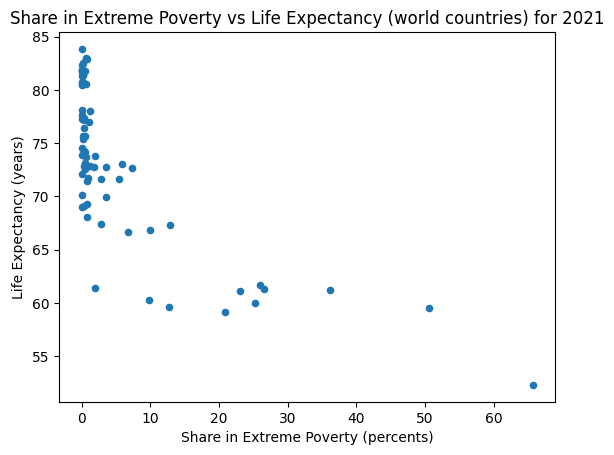

In [47]:
df_extreme_poverty_life_expectancy.plot.scatter(x='Share in extreme poverty', y='Life expectancy')
plt.xlabel('Share in Extreme Poverty (percents)')
plt.ylabel('Life Expectancy (years)')
plt.title('Share in Extreme Poverty vs Life Expectancy (world countries) for 2021')
plt.show()

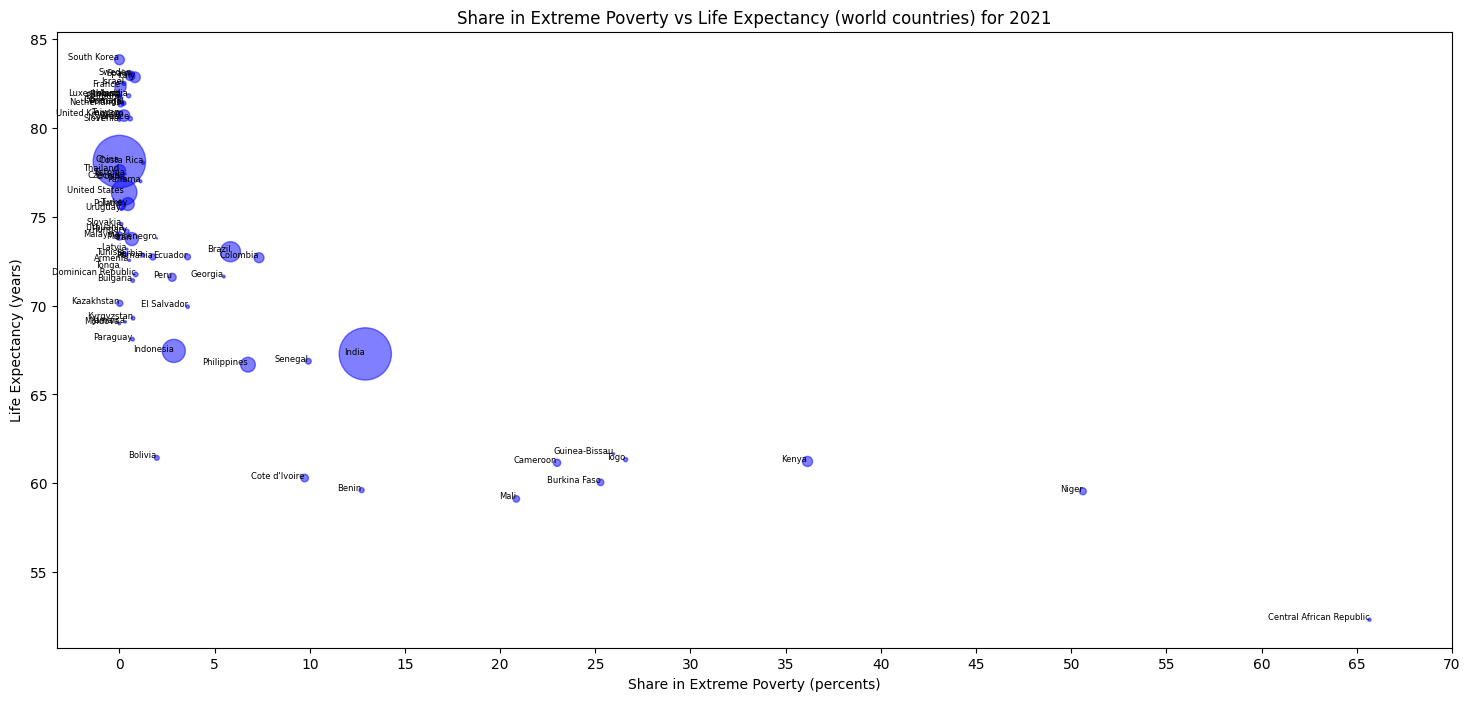

In [48]:
plt.figure(figsize=(18, 8))
plt.scatter(df_extreme_poverty_life_expectancy['Share in extreme poverty'], df_extreme_poverty_life_expectancy['Life expectancy'], color='blue', s = df_extreme_poverty_life_expectancy['Population']/1000000, alpha=0.5)

for i, country in enumerate(df_extreme_poverty_life_expectancy['Country']):
    plt.text(df_extreme_poverty_life_expectancy['Share in extreme poverty'].iloc[i], df_extreme_poverty_life_expectancy['Life expectancy'].iloc[i], df_extreme_poverty_life_expectancy['Country'].iloc[i], fontsize=6, ha='right')

plt.xticks([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70])
plt.xlabel('Share in Extreme Poverty (percents)')
plt.ylabel('Life Expectancy (years)')
plt.title('Share in Extreme Poverty vs Life Expectancy (world countries) for 2021')
plt.show()

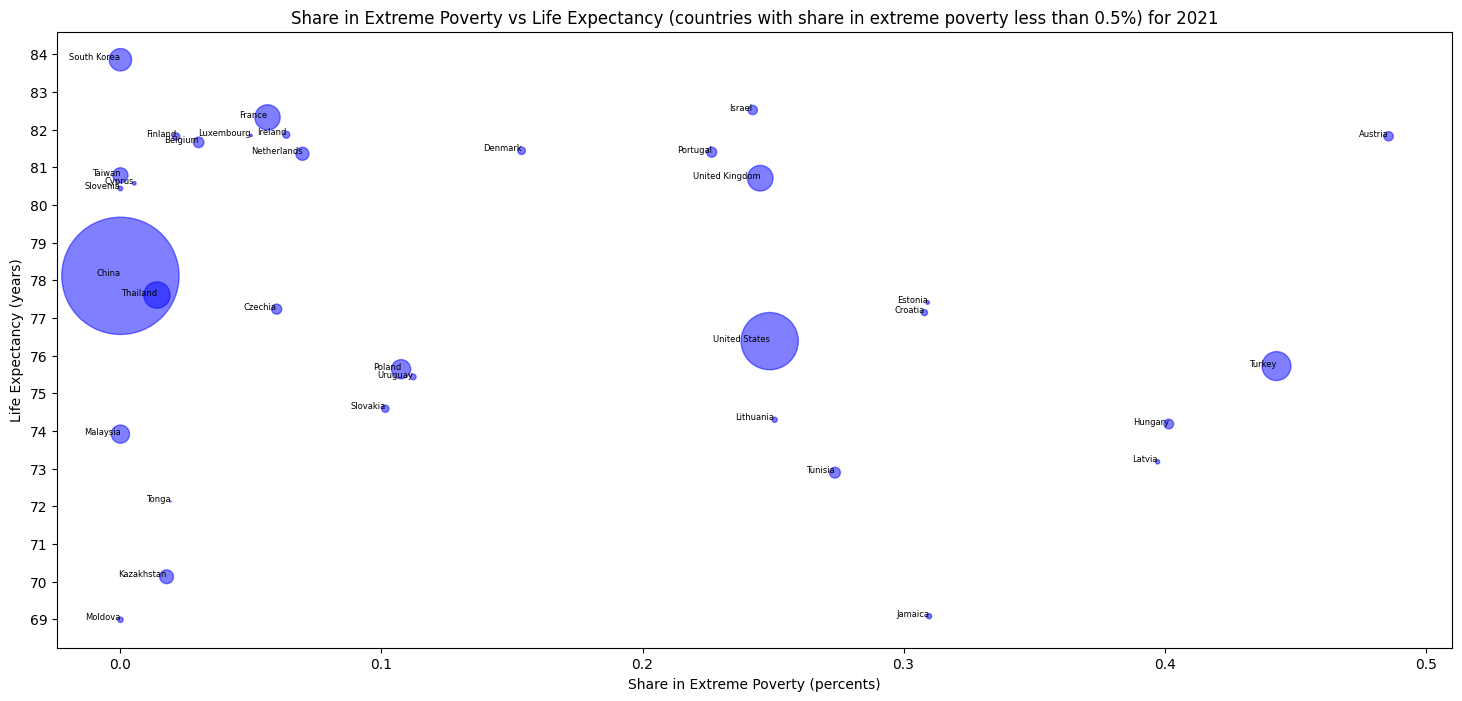

In [49]:
plt.figure(figsize=(18, 8))
df_low_extreme_poverty = df_extreme_poverty_life_expectancy[df_extreme_poverty_life_expectancy['Share in extreme poverty'] <= 0.5]
plt.scatter(df_low_extreme_poverty['Share in extreme poverty'], df_low_extreme_poverty['Life expectancy'], color='blue', s = df_low_extreme_poverty['Population']/200000, alpha=0.5)

for i, country in enumerate(df_low_extreme_poverty['Country']):
    plt.text(df_low_extreme_poverty['Share in extreme poverty'].iloc[i], df_low_extreme_poverty['Life expectancy'].iloc[i], df_low_extreme_poverty['Country'].iloc[i], fontsize=6, ha='right')

plt.yticks(range(69, 85))

plt.xlabel('Share in Extreme Poverty (percents)')
plt.ylabel('Life Expectancy (years)')
plt.title('Share in Extreme Poverty vs Life Expectancy (countries with share in extreme poverty less than 0.5%) for 2021')
plt.show()

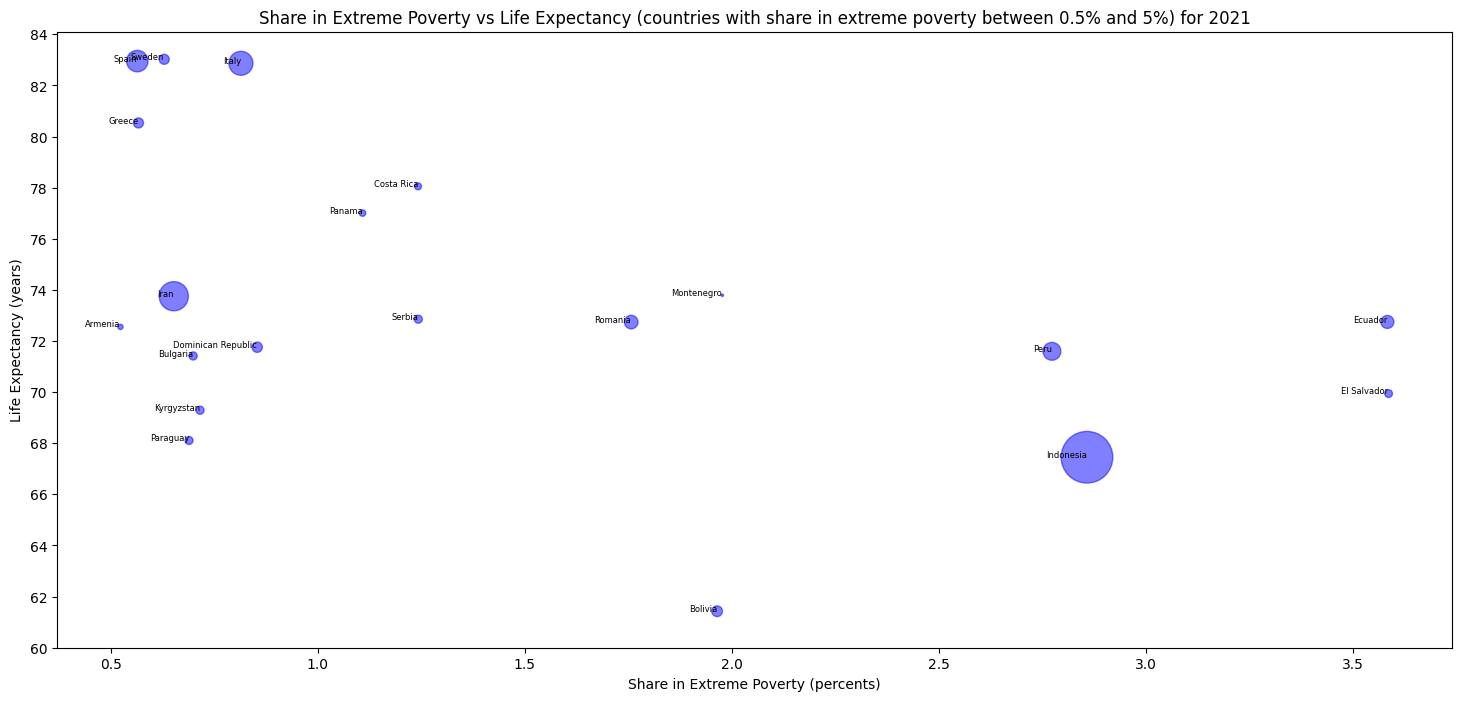

In [50]:
plt.figure(figsize=(18, 8))
df_middle_extreme_poverty = df_extreme_poverty_life_expectancy[(df_extreme_poverty_life_expectancy['Share in extreme poverty'] >= 0.5) & (df_extreme_poverty_life_expectancy['Share in extreme poverty'] <= 5)]
plt.scatter(df_middle_extreme_poverty['Share in extreme poverty'], df_middle_extreme_poverty['Life expectancy'], color='blue', s = df_middle_extreme_poverty['Population']/200000, alpha=0.5)

for i, country in enumerate(df_middle_extreme_poverty['Country']):
    plt.text(df_middle_extreme_poverty['Share in extreme poverty'].iloc[i], df_middle_extreme_poverty['Life expectancy'].iloc[i], df_middle_extreme_poverty['Country'].iloc[i], fontsize=6, ha='right')

plt.yticks(range(60, 85, 2))

plt.xlabel('Share in Extreme Poverty (percents)')
plt.ylabel('Life Expectancy (years)')
plt.title('Share in Extreme Poverty vs Life Expectancy (countries with share in extreme poverty between 0.5% and 5%) for 2021')
plt.show()

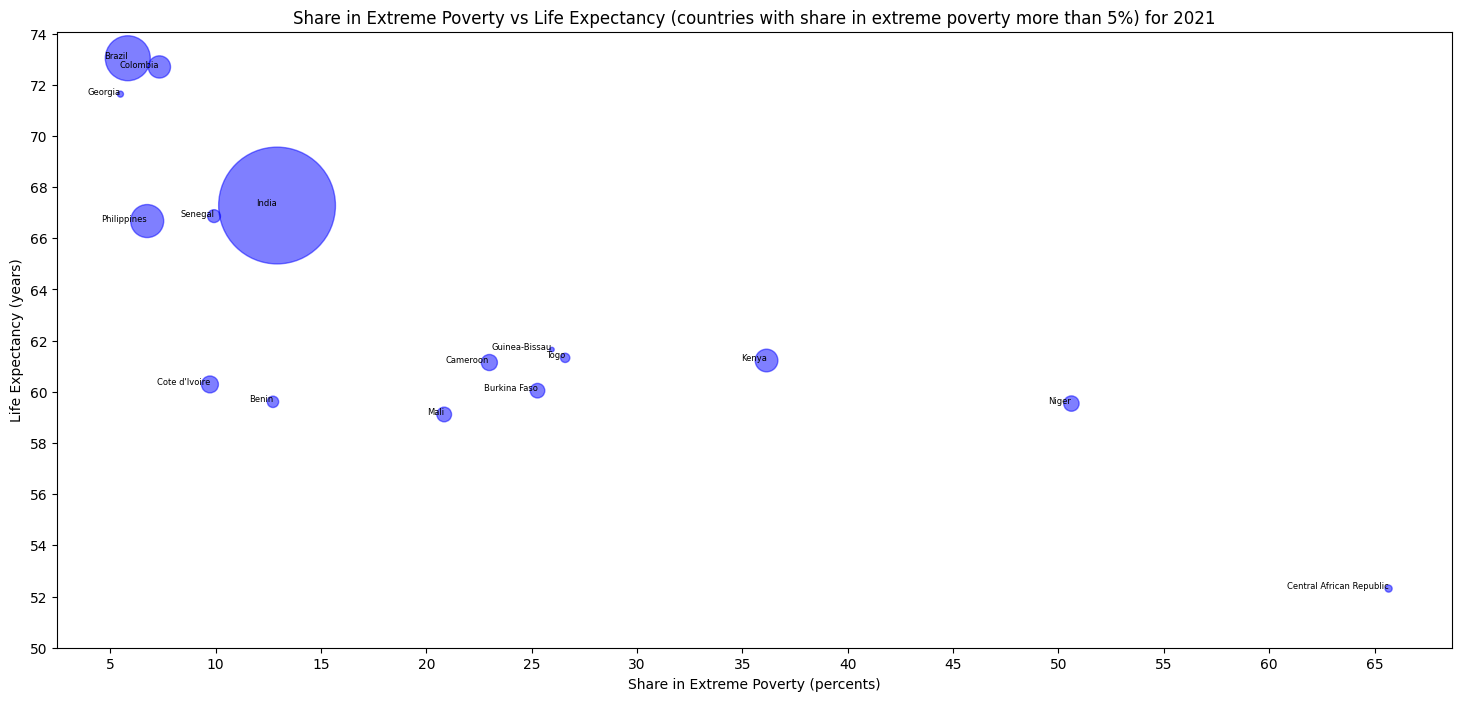

In [51]:
plt.figure(figsize=(18, 8))
df_high_extreme_poverty = df_extreme_poverty_life_expectancy[df_extreme_poverty_life_expectancy['Share in extreme poverty'] >= 5]
plt.scatter(df_high_extreme_poverty['Share in extreme poverty'], df_high_extreme_poverty['Life expectancy'], color='blue', s = df_high_extreme_poverty['Population']/200000, alpha=0.5)

for i, country in enumerate(df_high_extreme_poverty['Country']):
    plt.text(df_high_extreme_poverty['Share in extreme poverty'].iloc[i], df_high_extreme_poverty['Life expectancy'].iloc[i], df_high_extreme_poverty['Country'].iloc[i], fontsize=6, ha='right')

plt.xticks(range(5, 70, 5))
plt.yticks(range(50, 75, 2))

plt.xlabel('Share in Extreme Poverty (percents)')
plt.ylabel('Life Expectancy (years)')
plt.title('Share in Extreme Poverty vs Life Expectancy (countries with share in extreme poverty more than 5%) for 2021')
plt.show()

#### 5.1 Check which countries have high life expectancy but have higher share in extreme poverty for 2021?


In [52]:
# List countries with high life expectancy but higher share in extreme poverty using medians
median_life_expectancy = np.median(df_extreme_poverty_life_expectancy['Life expectancy'])
print('Median life expectancy is', median_life_expectancy)
median_extreme_poverty = np.median(df_extreme_poverty_life_expectancy['Share in extreme poverty'])
print('Median share in extreme poverty is', median_extreme_poverty)
df_higher_life_expectancy_higher_extreme_poverty_medians = df_extreme_poverty_life_expectancy[(df_extreme_poverty_life_expectancy['Life expectancy'] > median_life_expectancy) & (df_extreme_poverty_life_expectancy['Share in extreme poverty'] > median_extreme_poverty)]
print('The number of countries with high life expectancy but higher share in extreme poverty using medians is', len(df_higher_life_expectancy_higher_extreme_poverty_medians))
print('The list of countries with high life expectancy but higher share in extreme poverty using medians is:', ', '.join(df_higher_life_expectancy_higher_extreme_poverty_medians['Country']))

Median life expectancy is 73.7705
Median share in extreme poverty is 0.5438855499999999
The number of countries with high life expectancy but higher share in extreme poverty using medians is 7
The list of countries with high life expectancy but higher share in extreme poverty using medians is: Costa Rica, Greece, Italy, Montenegro, Panama, Spain, Sweden


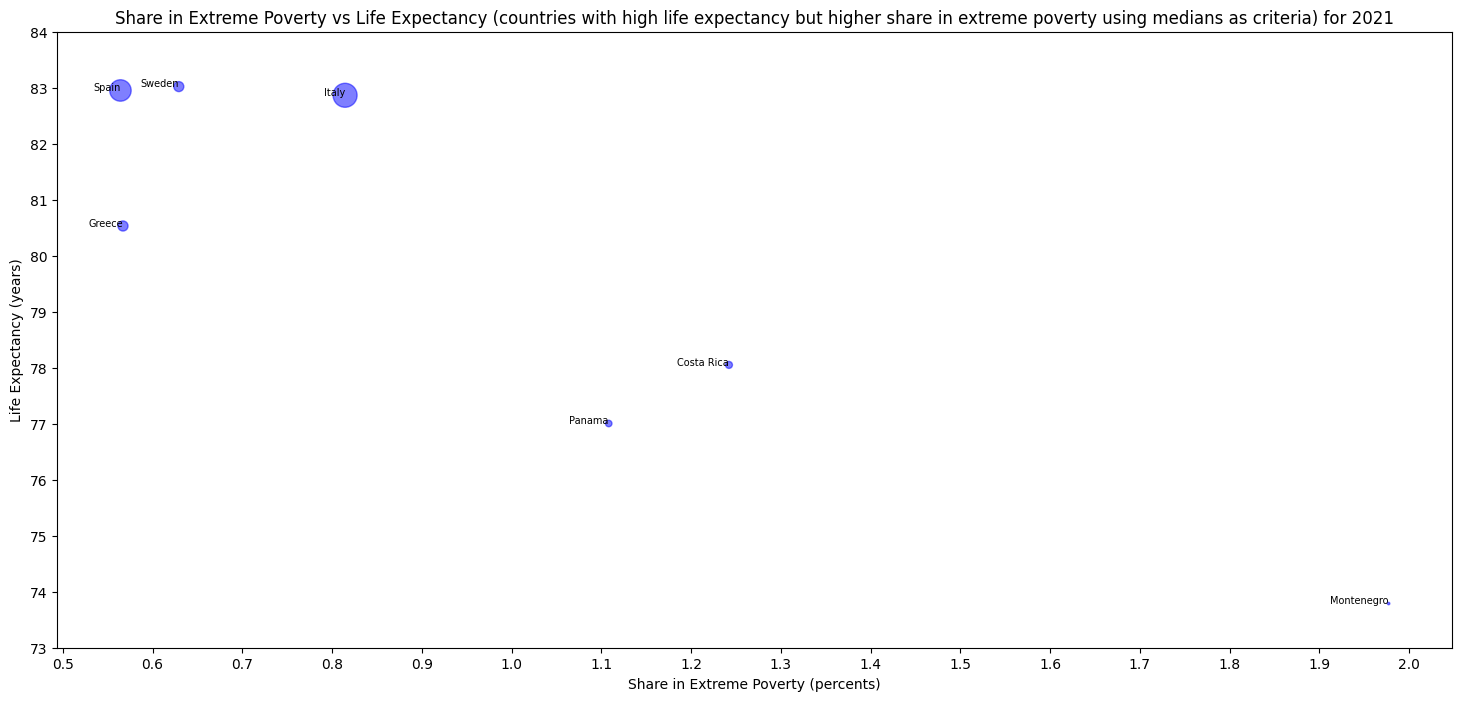

In [53]:
plt.figure(figsize=(18, 8))
plt.scatter(df_higher_life_expectancy_higher_extreme_poverty_medians['Share in extreme poverty'], df_higher_life_expectancy_higher_extreme_poverty_medians['Life expectancy'], color='blue', s = df_higher_life_expectancy_higher_extreme_poverty_medians['Population']/200000, alpha=0.5)

for i, country in enumerate(df_higher_life_expectancy_higher_extreme_poverty_medians['Country']):
    plt.text(df_higher_life_expectancy_higher_extreme_poverty_medians['Share in extreme poverty'].iloc[i], df_higher_life_expectancy_higher_extreme_poverty_medians['Life expectancy'].iloc[i], df_higher_life_expectancy_higher_extreme_poverty_medians['Country'].iloc[i], fontsize=7, ha='right')

plt.xticks([0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2])
plt.yticks(range(73, 85))

plt.xlabel('Share in Extreme Poverty (percents)')
plt.ylabel('Life Expectancy (years)')
plt.title('Share in Extreme Poverty vs Life Expectancy (countries with high life expectancy but higher share in extreme poverty using medians as criteria) for 2021')
plt.show()

In [54]:
# List countries with high life expectancy but higher share in extreme poverty using means
mean_life_expectancy = np.mean(df_extreme_poverty_life_expectancy['Life expectancy'])
print('Mean life expectancy is', mean_life_expectancy)
mean_extreme_poverty = np.mean(df_extreme_poverty_life_expectancy['Share in extreme poverty'])
print('Mean share in extreme poverty is', mean_extreme_poverty)
df_higher_life_expectancy_higher_extreme_poverty_means = df_extreme_poverty_life_expectancy[(df_extreme_poverty_life_expectancy['Life expectancy'] > mean_life_expectancy) & (df_extreme_poverty_life_expectancy['Share in extreme poverty'] > mean_extreme_poverty)]
print('The number of countries with high life expectancy but higher share in extreme poverty using means is', len(df_higher_life_expectancy_higher_extreme_poverty_means))

Mean life expectancy is 73.23942857142856
Mean share in extreme poverty is 5.409041956905713
The number of countries with high life expectancy but higher share in extreme poverty using means is 0


#### 5.2 Find whether each country with lower share in extreme poverty have high life expectancy?


In [55]:
upper_boundary_low_extreme_poverty = df_extreme_poverty_life_expectancy['Share in extreme poverty'].quantile(0.25)
print('The upper boundary for low share in extreme poverty is', upper_boundary_low_extreme_poverty)
df_lower_extreme_poverty = df_extreme_poverty_life_expectancy[df_extreme_poverty_life_expectancy['Share in extreme poverty'] <= upper_boundary_low_extreme_poverty]
print('The number of countries with lower index of extreme poverty using 25th percentile is', len(df_lower_extreme_poverty))
print('The list of countries with lower index of extreme poverty using 25th percentile is:', ', '.join(df_lower_extreme_poverty['Country']))

The upper boundary for low share in extreme poverty is 0.1029907725
The number of countries with lower index of extreme poverty using 25th percentile is 18
The list of countries with lower index of extreme poverty using 25th percentile is: Belgium, China, Cyprus, Czechia, Finland, France, Ireland, Kazakhstan, Luxembourg, Malaysia, Moldova, Netherlands, Slovakia, Slovenia, South Korea, Taiwan, Thailand, Tonga


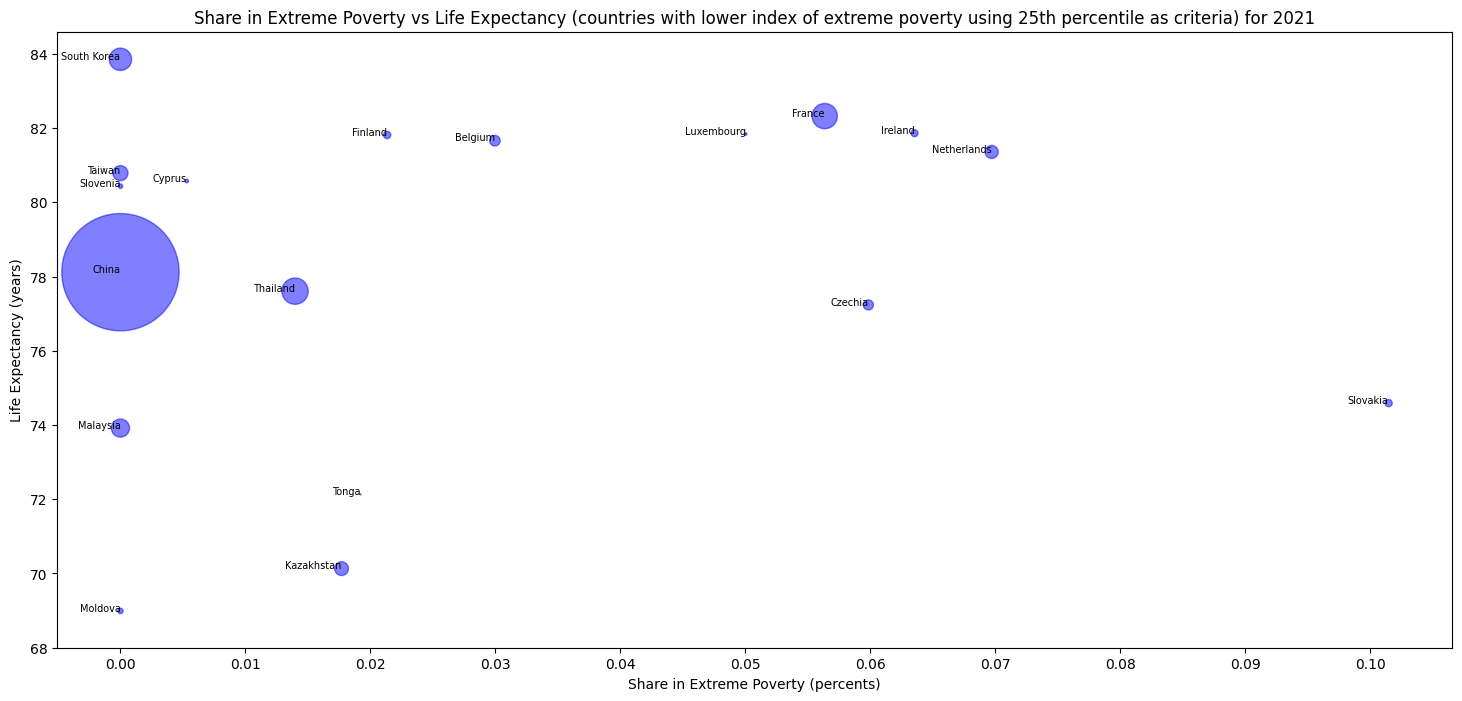

In [56]:
plt.figure(figsize=(18, 8))
plt.scatter(df_lower_extreme_poverty['Share in extreme poverty'], df_lower_extreme_poverty['Life expectancy'], color='blue', s = df_lower_extreme_poverty['Population']/200000, alpha=0.5)

for i, country in enumerate(df_lower_extreme_poverty['Country']):
    plt.text(df_lower_extreme_poverty['Share in extreme poverty'].iloc[i], df_lower_extreme_poverty['Life expectancy'].iloc[i], df_lower_extreme_poverty['Country'].iloc[i], fontsize=7, ha='right')

plt.xticks([0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.10])
plt.yticks(range(68, 86, 2))

plt.xlabel('Share in Extreme Poverty (percents)')
plt.ylabel('Life Expectancy (years)')
plt.title('Share in Extreme Poverty vs Life Expectancy (countries with lower index of extreme poverty using 25th percentile as criteria) for 2021')
plt.show()

In [57]:
lower_boundary_high_life_expectancy = np.quantile(df_extreme_poverty_life_expectancy['Life expectancy'], 0.75)
print('75th Percentile life expectancy is', lower_boundary_high_life_expectancy)
print('Mean life expectancy is', mean_life_expectancy)
upper_boundary_low_life_expectancy = np.quantile(df_extreme_poverty_life_expectancy['Life expectancy'], 0.25)
print('25th Percentile life expectancy is', upper_boundary_low_life_expectancy)

75th Percentile life expectancy is 80.50675000000001
Mean life expectancy is 73.23942857142856
25th Percentile life expectancy is 69.13624999999999


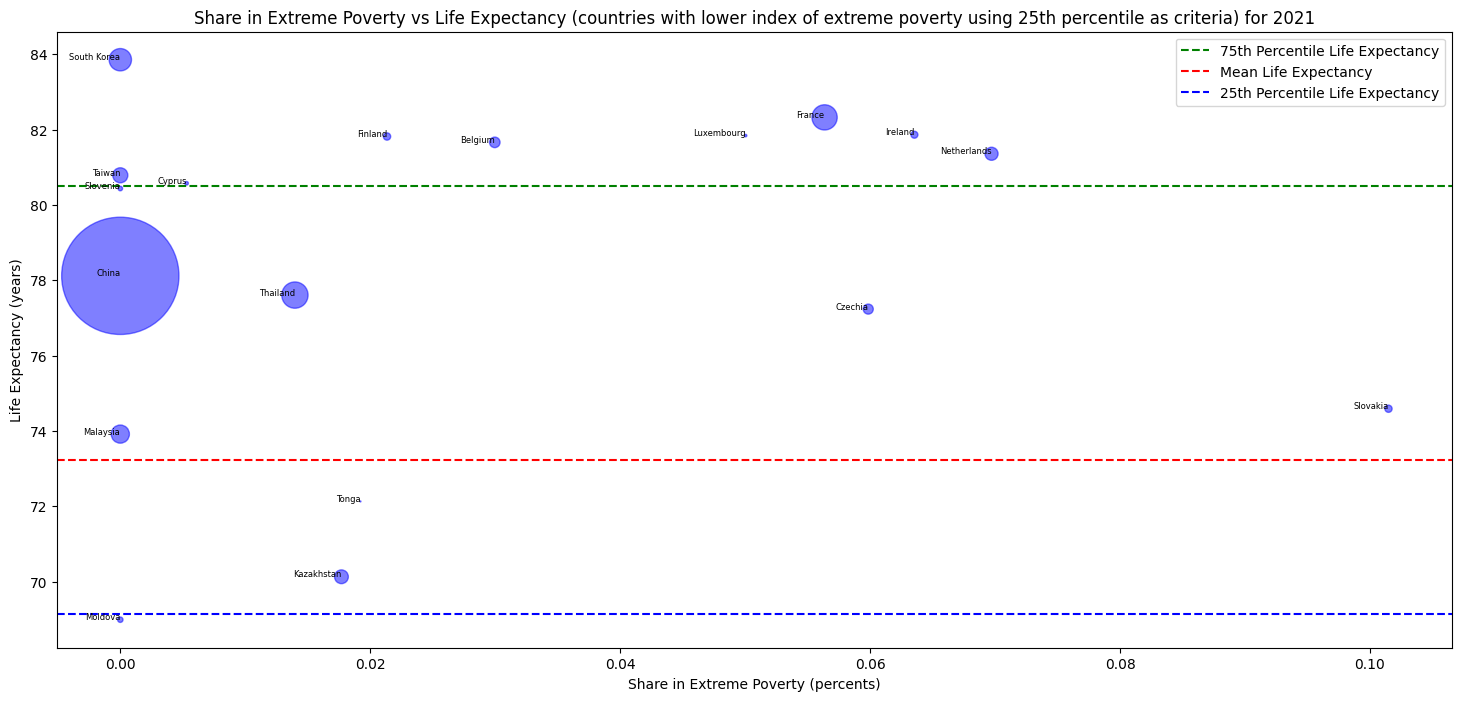

In [58]:
plt.figure(figsize=(18, 8))
plt.scatter(df_lower_extreme_poverty['Share in extreme poverty'], df_lower_extreme_poverty['Life expectancy'], color='blue', s = df_lower_extreme_poverty['Population']/200000, alpha=0.5)

for i, country in enumerate(df_lower_extreme_poverty['Country']):
    plt.text(df_lower_extreme_poverty['Share in extreme poverty'].iloc[i], df_lower_extreme_poverty['Life expectancy'].iloc[i], df_lower_extreme_poverty['Country'].iloc[i], fontsize=6, ha='right')

plt.axhline(y=lower_boundary_high_life_expectancy, color='green', linestyle='--', label='75th Percentile Life Expectancy')

plt.axhline(y=mean_life_expectancy, color='red', linestyle='--', label='Mean Life Expectancy')

plt.axhline(y=upper_boundary_low_life_expectancy, color='blue', linestyle='--', label='25th Percentile Life Expectancy')

plt.xlabel('Share in Extreme Poverty (percents)')
plt.ylabel('Life Expectancy (years)')
plt.title('Share in Extreme Poverty vs Life Expectancy (countries with lower index of extreme poverty using 25th percentile as criteria) for 2021')
plt.legend()
plt.show()

In [88]:
df_lower_extreme_poverty

,Country,Year,Life expectancy,Share in extreme poverty,Population
5502,Belgium,2021,81.659,0.029965,1.157084e+07
10765,China,2021,78.117,0.000000,1.426437e+09
13045,Cyprus,2021,80.573,0.005303,1.317312e+06
13306,Czechia,2021,77.234,0.059851,1.053068e+07
18681,Finland,2021,81.814,0.021343,5.541068e+06
18942,France,2021,82.322,0.056357,6.608355e+07
25393,Ireland,2021,81.861,0.063545,5.028430e+06
27103,Kazakhstan,2021,70.131,0.017695,1.974361e+07
31476,Luxembourg,2021,81.839,0.050037,6.402760e+05
32345,Malaysia,2021,73.917,0.000000,3.428240e+07


#### 6. Draw a scatter plot of Self-Reported Life Satisfaction (Cantril Ladder Score) vs Political Corruption Index for 2021


In [60]:
df_life_satisfaction.describe()

,Year,Cantril ladder score
count,147.0,147.000000
mean,2021.0,5.564560
std,0.0,1.091243
min,2021.0,2.403800
25%,2021.0,4.889200
50%,2021.0,5.578300
75%,2021.0,6.324950
max,2021.0,7.821000


In [61]:
df_political_corruption.describe()

,Year,Political corruption index
count,180.0,180.000000
mean,2021.0,0.482430
std,0.0,0.296203
min,2021.0,0.002000
25%,2021.0,0.192750
50%,2021.0,0.511500
75%,2021.0,0.736750
max,2021.0,0.967000


In [62]:
# Merge the above two data frames using inner join on 'Çountry' column
df_life_satisfaction_political_corruption = pd.merge(df_life_satisfaction, df_political_corruption, on='Country', how='inner')

In [63]:
df_life_satisfaction_political_corruption

,Country,Year_x,Cantril ladder score,Year_y,Political corruption index
0,Afghanistan,2021,2.4038,2021,0.397
1,Albania,2021,5.1988,2021,0.609
2,Algeria,2021,5.1223,2021,0.693
3,Argentina,2021,5.9670,2021,0.471
4,Armenia,2021,5.3986,2021,0.315
...,...,...,...,...,...
140,Venezuela,2021,4.9255,2021,0.967
141,Vietnam,2021,5.4850,2021,0.484
142,Yemen,2021,4.1969,2021,0.936
143,Zambia,2021,3.7598,2021,0.440


In [64]:
df_life_satisfaction_political_corruption.describe()

,Year_x,Cantril ladder score,Year_y,Political corruption index
count,145.0,145.000000,145.0,145.000000
mean,2021.0,5.572698,2021.0,0.469389
std,0.0,1.095028,0.0,0.302031
min,2021.0,2.403800,2021.0,0.002000
25%,2021.0,4.890500,2021.0,0.172000
50%,2021.0,5.585300,2021.0,0.502000
75%,2021.0,6.340800,2021.0,0.735000
max,2021.0,7.821000,2021.0,0.967000


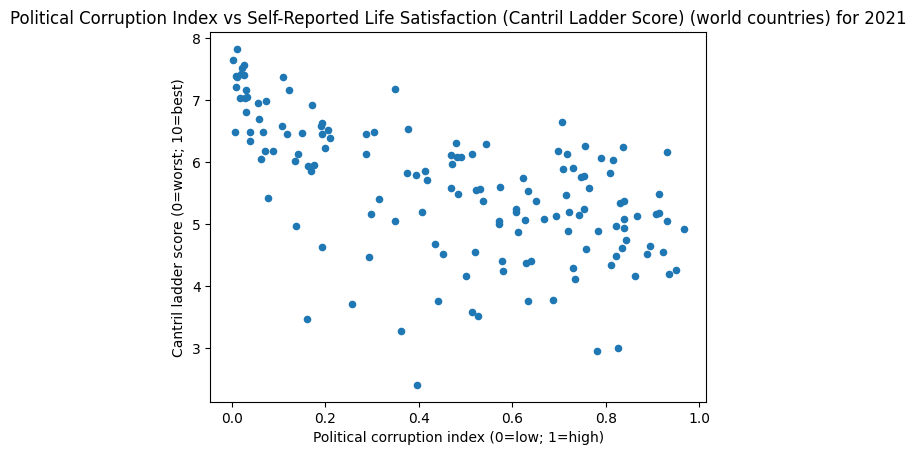

In [65]:
df_life_satisfaction_political_corruption.plot.scatter(x='Political corruption index', y='Cantril ladder score')
plt.xlabel('Political corruption index (0=low; 1=high)')
plt.ylabel('Cantril ladder score (0=worst; 10=best)')
plt.title('Political Corruption Index vs Self-Reported Life Satisfaction (Cantril Ladder Score) (world countries) for 2021')
plt.show()

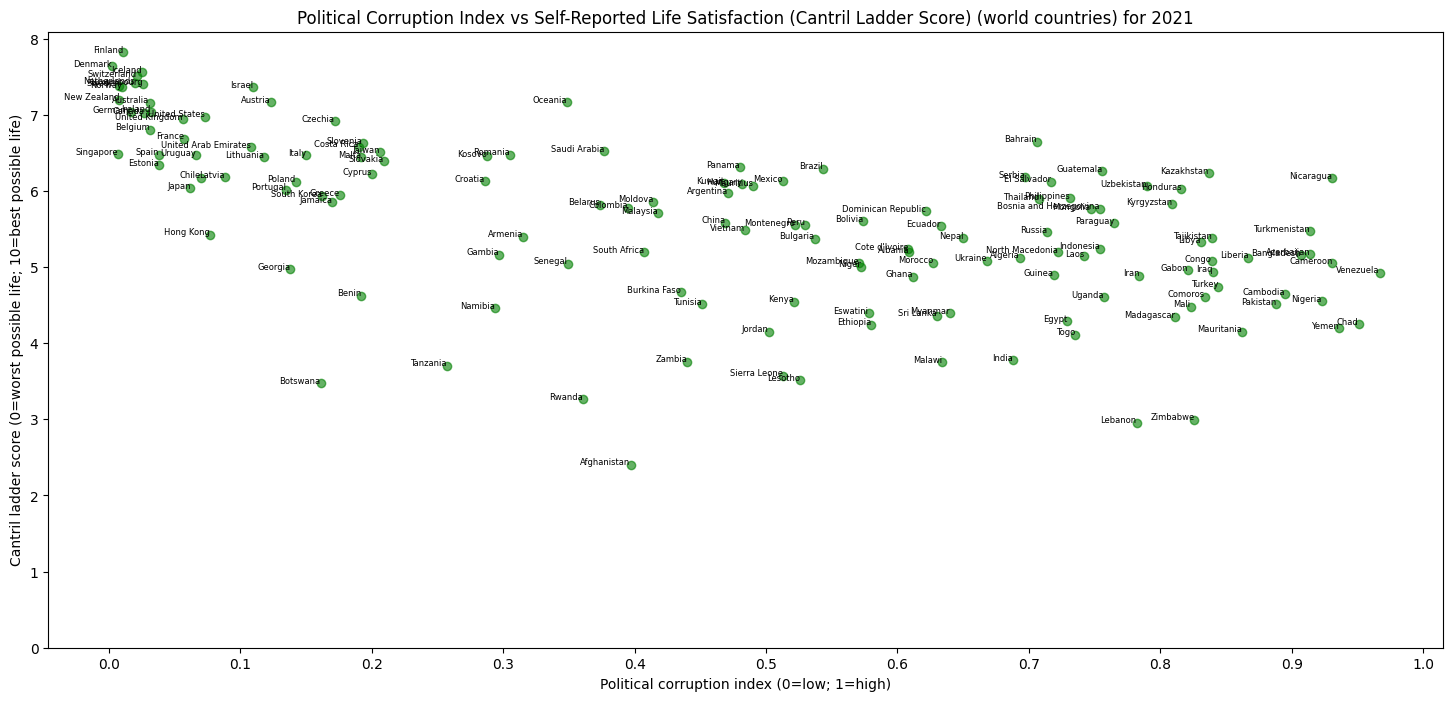

In [66]:
plt.figure(figsize=(18, 8))
plt.scatter(df_life_satisfaction_political_corruption['Political corruption index'], df_life_satisfaction_political_corruption['Cantril ladder score'], color='green', alpha=0.6)

for i, country in enumerate(df_life_satisfaction_political_corruption['Country']):
    plt.text(df_life_satisfaction_political_corruption['Political corruption index'].iloc[i], df_life_satisfaction_political_corruption['Cantril ladder score'].iloc[i], df_life_satisfaction_political_corruption['Country'].iloc[i], fontsize=6, ha='right')

plt.xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.yticks(range(0, 9))

plt.xlabel('Political corruption index (0=low; 1=high)')
plt.ylabel('Cantril ladder score (0=worst possible life; 10=best possible life)')
plt.title('Political Corruption Index vs Self-Reported Life Satisfaction (Cantril Ladder Score) (world countries) for 2021')
plt.show()

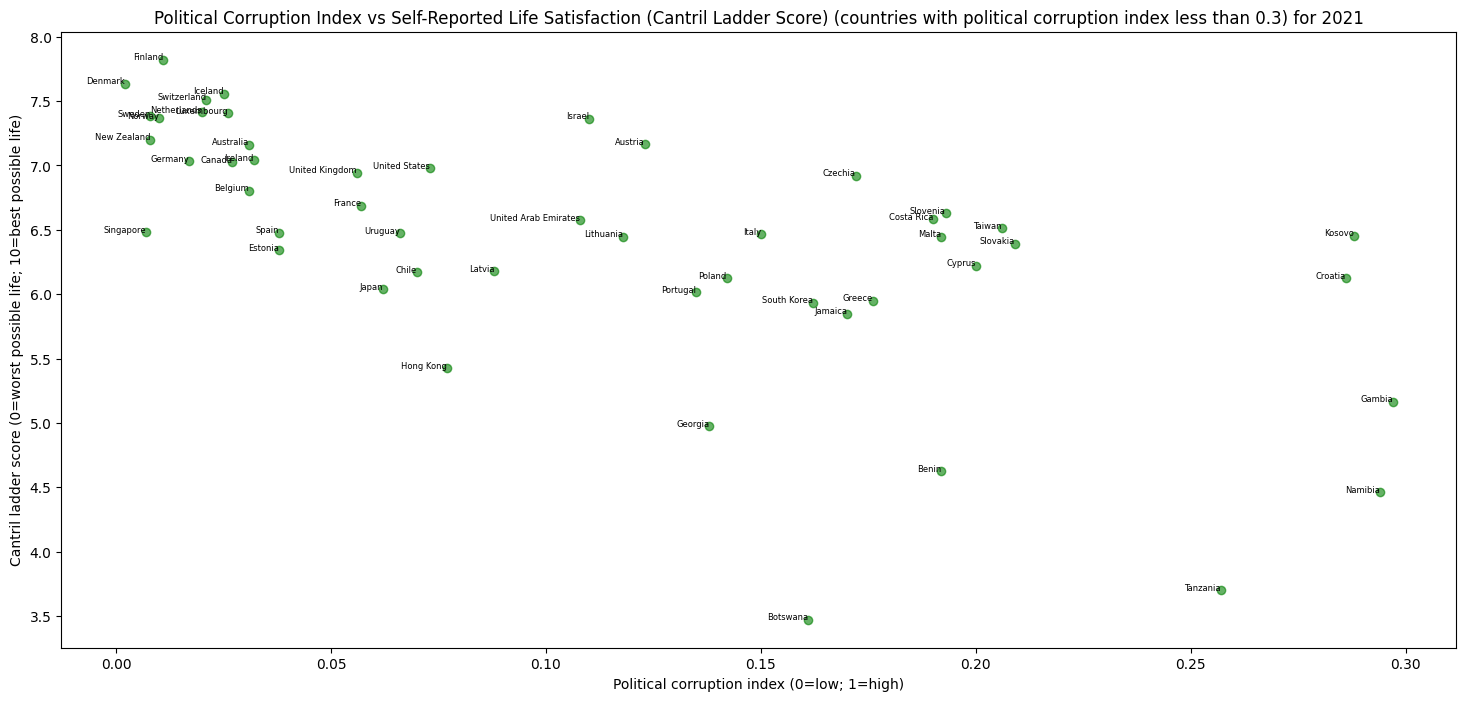

In [67]:
plt.figure(figsize=(18, 8))
df_low_political_corruption = df_life_satisfaction_political_corruption[df_life_satisfaction_political_corruption['Political corruption index'] <= 0.3]
plt.scatter(df_low_political_corruption['Political corruption index'], df_low_political_corruption['Cantril ladder score'], color='green', alpha=0.6)

for i, country in enumerate(df_low_political_corruption['Country']):
    plt.text(df_low_political_corruption['Political corruption index'].iloc[i], df_low_political_corruption['Cantril ladder score'].iloc[i], df_low_political_corruption['Country'].iloc[i], fontsize=6, ha='right')

plt.yticks([3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8])

plt.xlabel('Political corruption index (0=low; 1=high)')
plt.ylabel('Cantril ladder score (0=worst possible life; 10=best possible life)')
plt.title('Political Corruption Index vs Self-Reported Life Satisfaction (Cantril Ladder Score) (countries with political corruption index less than 0.3) for 2021')
plt.show()

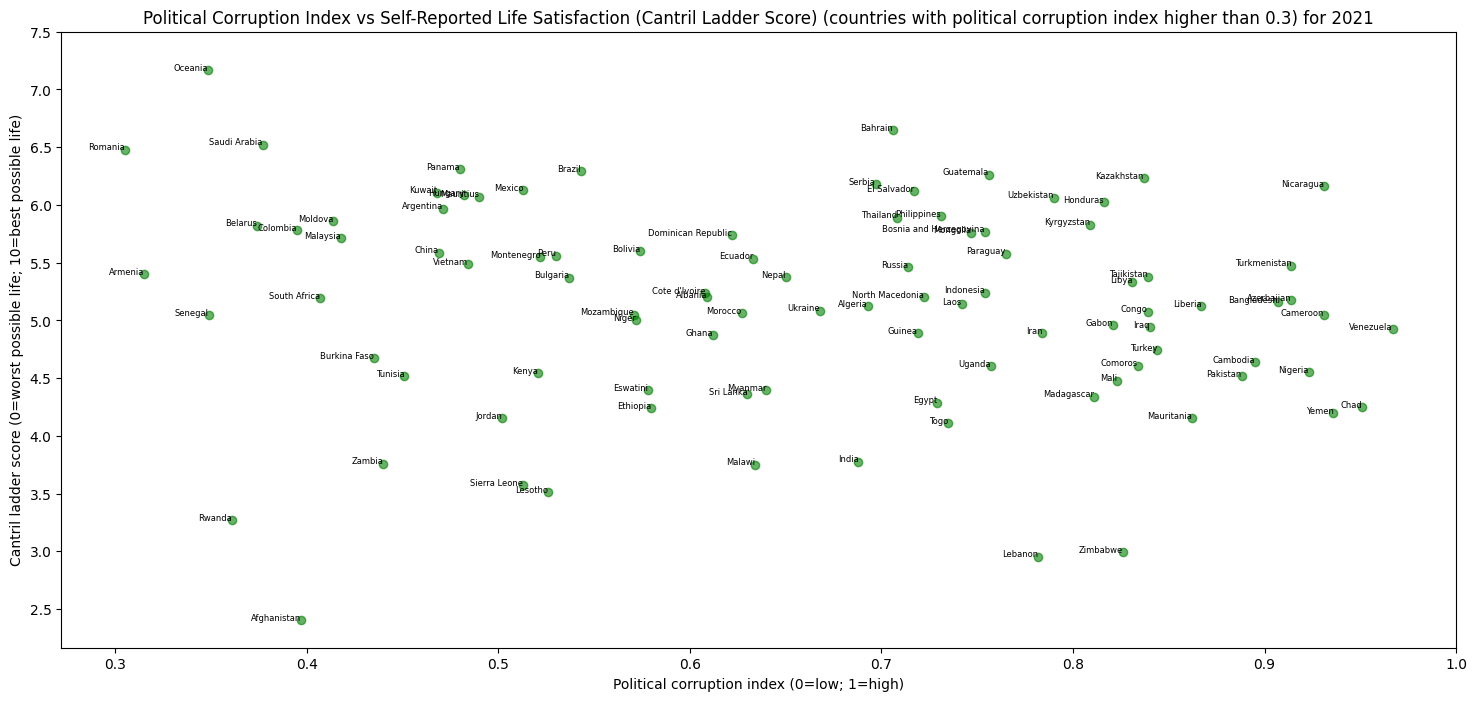

In [68]:
plt.figure(figsize=(18, 8))
df_high_political_corruption = df_life_satisfaction_political_corruption[df_life_satisfaction_political_corruption['Political corruption index'] >= 0.3]
plt.scatter(df_high_political_corruption['Political corruption index'], df_high_political_corruption['Cantril ladder score'], color='green', alpha=0.6)

for i, country in enumerate(df_high_political_corruption['Country']):
    plt.text(df_high_political_corruption['Political corruption index'].iloc[i], df_high_political_corruption['Cantril ladder score'].iloc[i], df_high_political_corruption['Country'].iloc[i], fontsize=6, ha='right')

plt.yticks([2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5])

plt.xlabel('Political corruption index (0=low; 1=high)')
plt.ylabel('Cantril ladder score (0=worst possible life; 10=best possible life)')
plt.title('Political Corruption Index vs Self-Reported Life Satisfaction (Cantril Ladder Score) (countries with political corruption index higher than 0.3) for 2021')
plt.show()

#### 6.1 Which are the top 10 happiest world countries?


In [69]:
top_10_happiest_countries = df_life_satisfaction_political_corruption.sort_values(by='Cantril ladder score', ascending=False).head(10)

In [70]:
top_10_happiest_countries

,Country,Year_x,Cantril ladder score,Year_y,Political corruption index
41,Finland,2021,7.8210,2021,0.011
33,Denmark,2021,7.6362,2021,0.002
54,Iceland,2021,7.5575,2021,0.025
124,Switzerland,2021,7.5116,2021,0.021
94,Netherlands,2021,7.4149,2021,0.020
77,Luxembourg,2021,7.4040,2021,0.026
123,Sweden,2021,7.3843,2021,0.008
100,Norway,2021,7.3651,2021,0.010
60,Israel,2021,7.3638,2021,0.110
95,New Zealand,2021,7.1998,2021,0.008


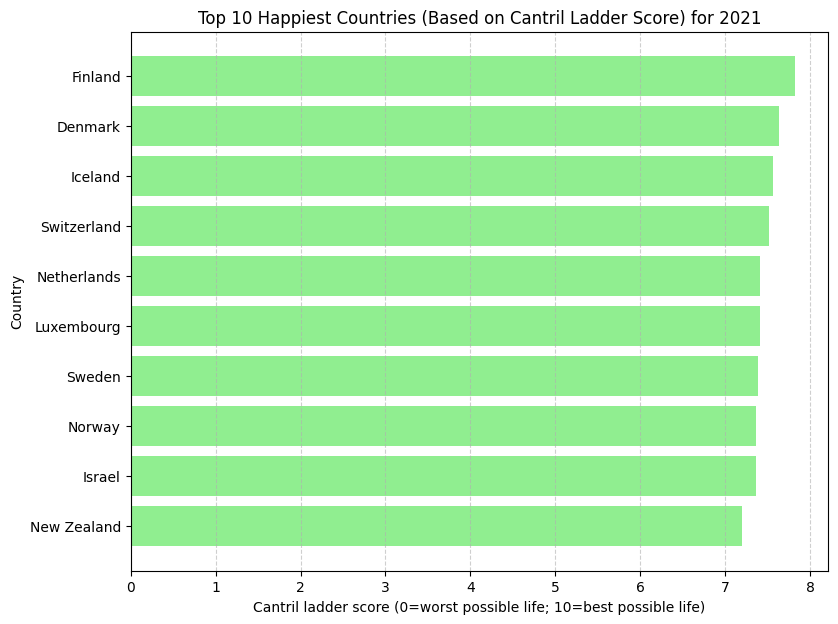

In [71]:
plt.figure(figsize=(9, 7))
plt.barh(top_10_happiest_countries['Country'], top_10_happiest_countries['Cantril ladder score'], color='lightgreen')
plt.xlabel('Cantril ladder score (0=worst possible life; 10=best possible life)')
plt.ylabel('Country')
plt.title('Top 10 Happiest Countries (Based on Cantril Ladder Score) for 2021')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

#### 6.2 Which are the top 20 most politically corrupted world countries?


In [72]:
top_20_most_politically_corrupted_countries = df_life_satisfaction_political_corruption.sort_values(by='Political corruption index', ascending=False).head(20)

In [73]:
top_20_most_politically_corrupted_countries

,Country,Year_x,Cantril ladder score,Year_y,Political corruption index
140,Venezuela,2021,4.9255,2021,0.967
22,Chad,2021,4.2508,2021,0.951
142,Yemen,2021,4.1969,2021,0.936
20,Cameroon,2021,5.0476,2021,0.931
96,Nicaragua,2021,6.1646,2021,0.931
98,Nigeria,2021,4.5520,2021,0.923
132,Turkmenistan,2021,5.4743,2021,0.914
7,Azerbaijan,2021,5.1734,2021,0.914
9,Bangladesh,2021,5.1555,2021,0.907
19,Cambodia,2021,4.6403,2021,0.895


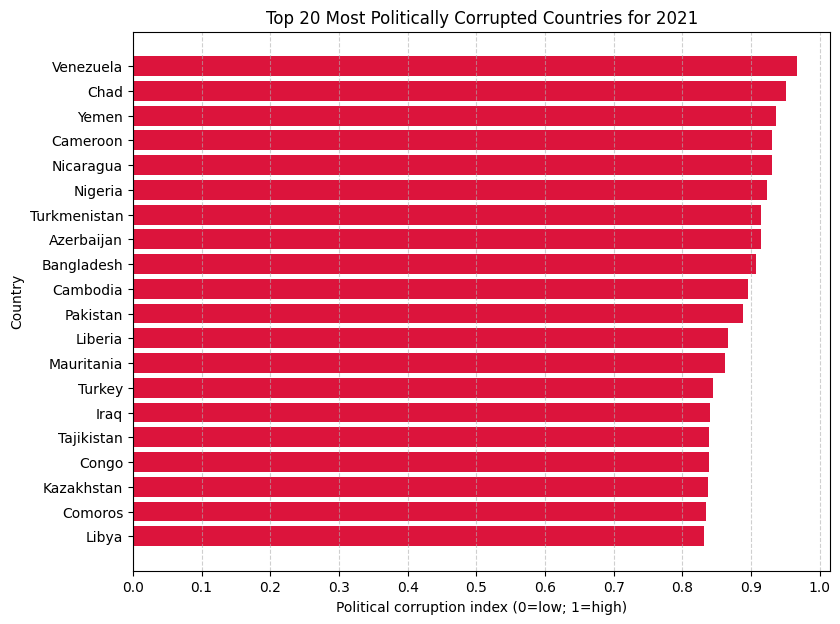

In [89]:
plt.figure(figsize=(9, 7))
plt.barh(top_20_most_politically_corrupted_countries['Country'], top_20_most_politically_corrupted_countries['Political corruption index'], color='crimson')
plt.xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.xlabel('Political corruption index (0=low; 1=high)')
plt.ylabel('Country')
plt.title('Top 20 Most Politically Corrupted Countries for 2021')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

#### 6.3 Find whether each country with low political corruption index have high Cantril ladder score?

In [75]:
upper_boundary_low_political_coruption = np.quantile(df_life_satisfaction_political_corruption['Political corruption index'], 0.25)
print('25th Percentile political corruption index is', upper_boundary_low_political_coruption)

25th Percentile political corruption index is 0.172


In [76]:
df_lower_political_corruption = df_life_satisfaction_political_corruption[
    df_life_satisfaction_political_corruption['Political corruption index'] <= upper_boundary_low_political_coruption]
print('The number of countries with lower political corruption index using 25th percentile is', len(df_lower_political_corruption))
print('The list of countries with lower political corruption index using 25th percentile is:', ', '.join(df_lower_political_corruption['Country']))

The number of countries with lower political corruption index using 25th percentile is 37
The list of countries with lower political corruption index using 25th percentile is: Australia, Austria, Belgium, Botswana, Canada, Chile, Czechia, Denmark, Estonia, Finland, France, Georgia, Germany, Hong Kong, Iceland, Ireland, Israel, Italy, Jamaica, Japan, Latvia, Lithuania, Luxembourg, Netherlands, New Zealand, Norway, Poland, Portugal, Singapore, South Korea, Spain, Sweden, Switzerland, United Arab Emirates, United Kingdom, United States, Uruguay


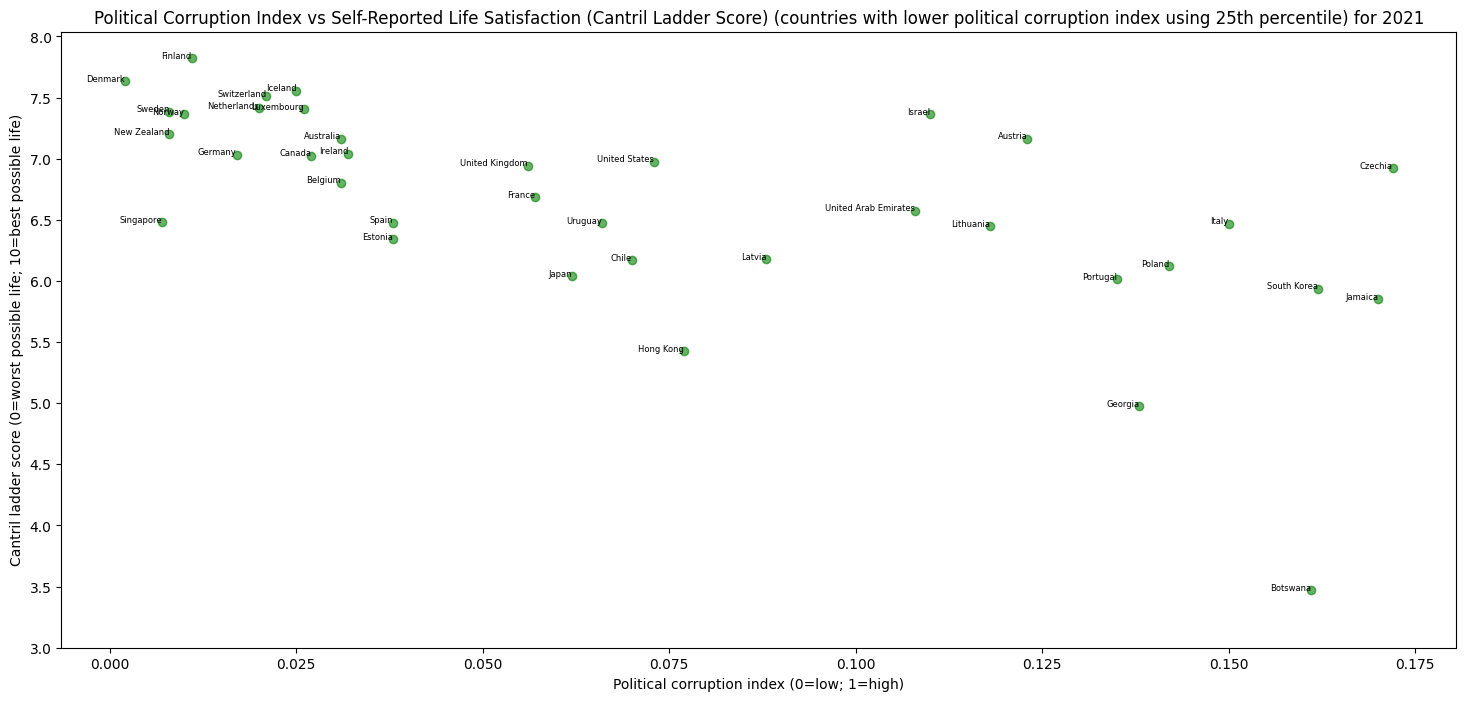

In [77]:
plt.figure(figsize=(18, 8))
plt.scatter(df_lower_political_corruption['Political corruption index'], df_lower_political_corruption['Cantril ladder score'], color='green', alpha=0.6)

for i, country in enumerate(df_lower_political_corruption['Country']):
    plt.text(df_lower_political_corruption['Political corruption index'].iloc[i], df_lower_political_corruption['Cantril ladder score'].iloc[i], df_lower_political_corruption['Country'].iloc[i], fontsize=6, ha='right')

plt.yticks([3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8])

plt.xlabel('Political corruption index (0=low; 1=high)')
plt.ylabel('Cantril ladder score (0=worst possible life; 10=best possible life)')
plt.title('Political Corruption Index vs Self-Reported Life Satisfaction (Cantril Ladder Score) (countries with lower political corruption index using 25th percentile) for 2021')
plt.show()

In [78]:
lower_boundary_high_life_satisfaction = np.quantile(df_life_satisfaction_political_corruption['Cantril ladder score'], 0.75)
print('75th Percentile Cantril ladder score is', lower_boundary_high_life_satisfaction)
mean_life_satisfaction = np.mean(df_life_satisfaction_political_corruption['Cantril ladder score'])
print('Mean Cantril ladder score is', mean_life_satisfaction)
upper_boundary_low_life_satisfaction = np.quantile(df_life_satisfaction_political_corruption['Cantril ladder score'], 0.25)
print('25th Percentile Cantril ladder score is', upper_boundary_low_life_satisfaction)

75th Percentile Cantril ladder score is 6.3408
Mean Cantril ladder score is 5.572698126206896
25th Percentile Cantril ladder score is 4.8905


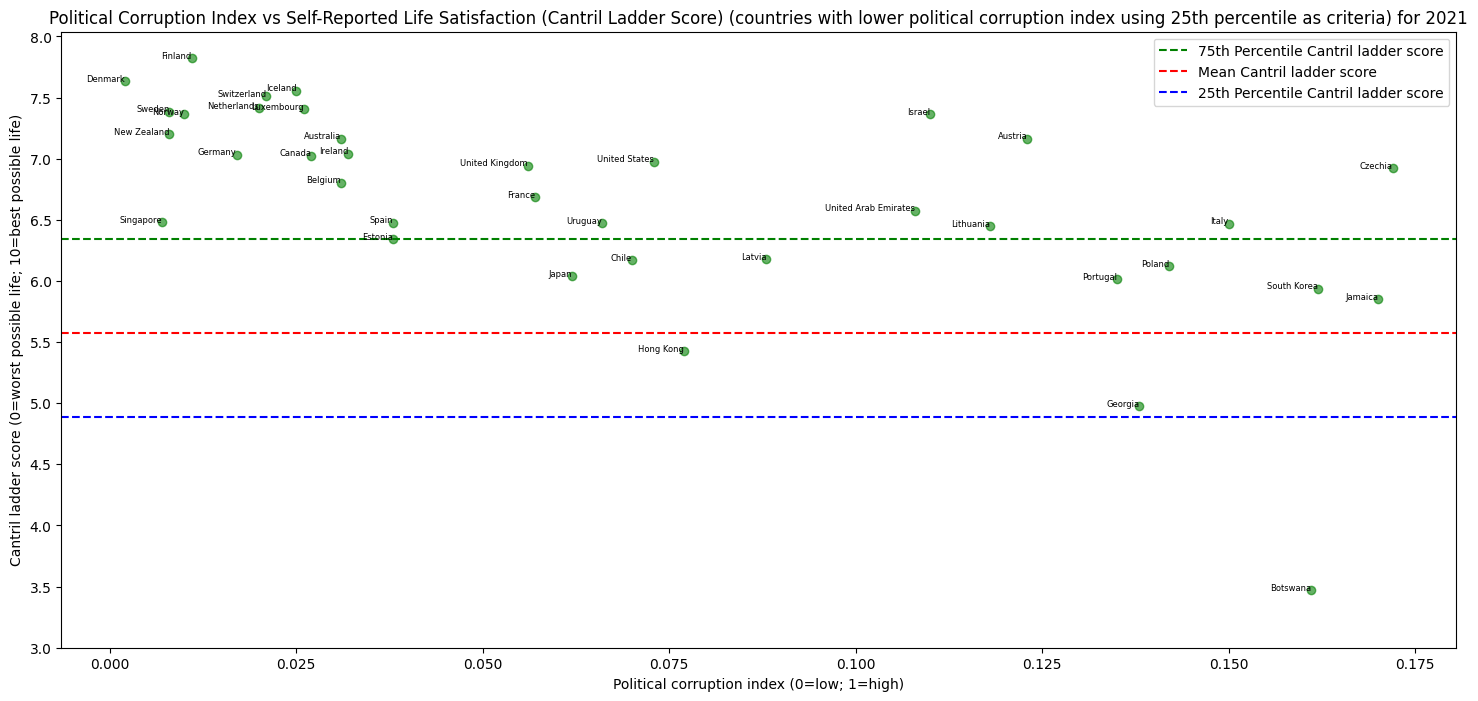

In [79]:
plt.figure(figsize=(18, 8))
plt.scatter(df_lower_political_corruption['Political corruption index'], df_lower_political_corruption['Cantril ladder score'], color='green', alpha=0.6)

for i, country in enumerate(df_lower_political_corruption['Country']):
    plt.text(df_lower_political_corruption['Political corruption index'].iloc[i], df_lower_political_corruption['Cantril ladder score'].iloc[i], df_lower_political_corruption['Country'].iloc[i], fontsize=6, ha='right')

plt.yticks([3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8])

plt.axhline(y=lower_boundary_high_life_satisfaction, color='green', linestyle='--', label='75th Percentile Cantril ladder score')

plt.axhline(y=mean_life_satisfaction, color='red', linestyle='--', label='Mean Cantril ladder score')

plt.axhline(y=upper_boundary_low_life_satisfaction, color='blue', linestyle='--', label='25th Percentile Cantril ladder score')

plt.xlabel('Political corruption index (0=low; 1=high)')
plt.ylabel('Cantril ladder score (0=worst possible life; 10=best possible life)')
plt.title('Political Corruption Index vs Self-Reported Life Satisfaction (Cantril Ladder Score) (countries with lower political corruption index using 25th percentile as criteria) for 2021')
plt.legend()
plt.show()

#### 6.4 Check if there are highly politically corrupted countries that have high Cantril ladder score?


In [80]:
lower_boundary_high_political_corruption = np.quantile(df_life_satisfaction_political_corruption['Political corruption index'], 0.75)
print('75th Percentile political corruption index is', lower_boundary_high_political_corruption)

75th Percentile political corruption index is 0.735


In [81]:
df_higher_political_corruption = df_life_satisfaction_political_corruption[
    df_life_satisfaction_political_corruption['Political corruption index'] >= lower_boundary_high_political_corruption]
print('The number of countries with higher political corruption index using 75th percentile is', len(df_higher_political_corruption))
print('The list of countries with higher political corruption index using 75th percentile is:', ', '.join(df_higher_political_corruption['Country']))

The number of countries with higher political corruption index using 75th percentile is 37
The list of countries with higher political corruption index using 75th percentile is: Azerbaijan, Bangladesh, Bosnia and Herzegovina, Cambodia, Cameroon, Chad, Comoros, Congo, Gabon, Guatemala, Honduras, Indonesia, Iran, Iraq, Kazakhstan, Kyrgyzstan, Laos, Lebanon, Liberia, Libya, Madagascar, Mali, Mauritania, Mongolia, Nicaragua, Nigeria, Pakistan, Paraguay, Tajikistan, Togo, Turkey, Turkmenistan, Uganda, Uzbekistan, Venezuela, Yemen, Zimbabwe


In [82]:
df_higher_political_corruption_higher_life_satisfaction = df_higher_political_corruption[df_higher_political_corruption['Cantril ladder score'] > mean_life_satisfaction]
df_higher_political_corruption_higher_life_satisfaction

,Country,Year_x,Cantril ladder score,Year_y,Political corruption index
14,Bosnia and Herzegovina,2021,5.7680,2021,0.754
49,Guatemala,2021,6.2622,2021,0.756
51,Honduras,2021,6.0221,2021,0.816
65,Kazakhstan,2021,6.2341,2021,0.837
69,Kyrgyzstan,2021,5.8285,2021,0.809
87,Mongolia,2021,5.7607,2021,0.747
96,Nicaragua,2021,6.1646,2021,0.931
104,Paraguay,2021,5.5783,2021,0.765
139,Uzbekistan,2021,6.0627,2021,0.790


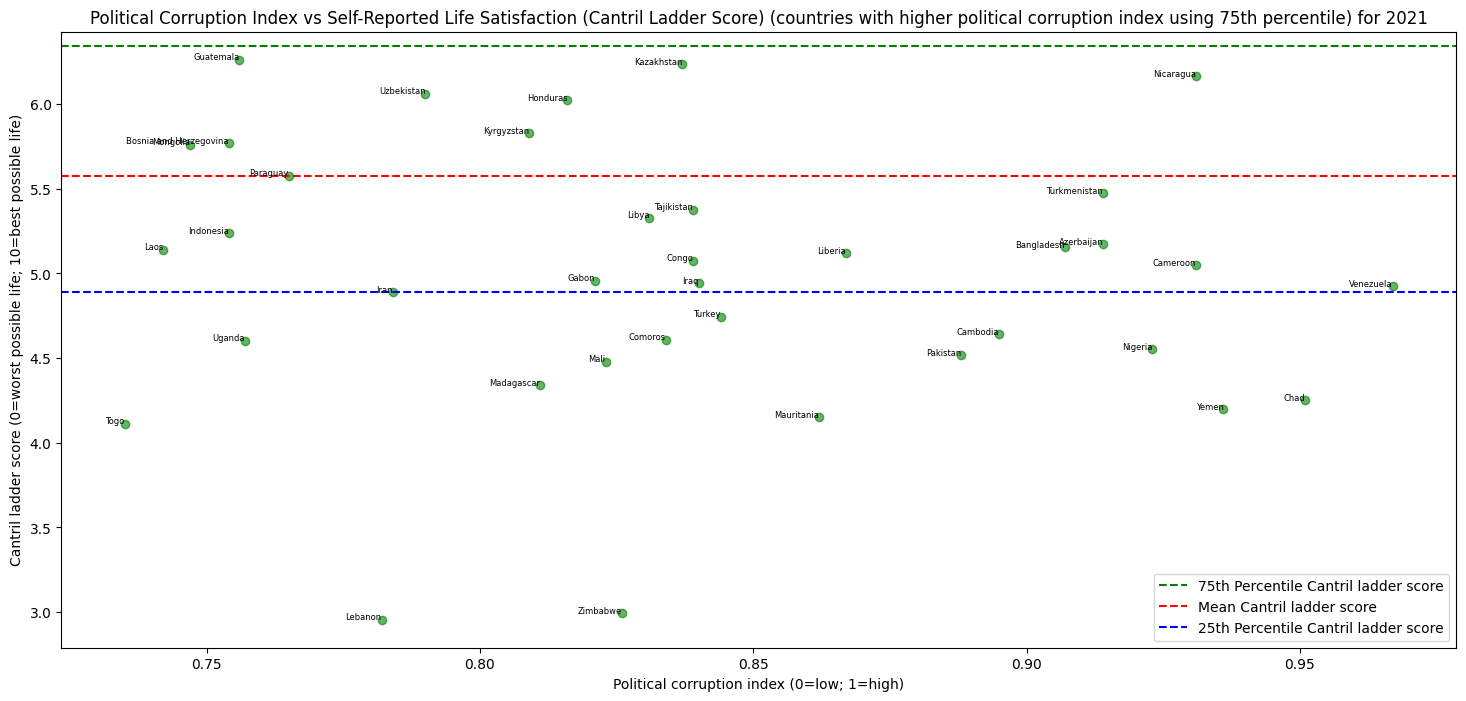

In [83]:
plt.figure(figsize=(18, 8))
plt.scatter(df_higher_political_corruption['Political corruption index'], df_higher_political_corruption['Cantril ladder score'], color='green', alpha=0.6)

for i, country in enumerate(df_higher_political_corruption['Country']):
    plt.text(df_higher_political_corruption['Political corruption index'].iloc[i], df_higher_political_corruption['Cantril ladder score'].iloc[i], df_higher_political_corruption['Country'].iloc[i], fontsize=6, ha='right')

plt.axhline(y=lower_boundary_high_life_satisfaction, color='green', linestyle='--', label='75th Percentile Cantril ladder score')

plt.axhline(y=mean_life_satisfaction, color='red', linestyle='--', label='Mean Cantril ladder score')

plt.axhline(y=upper_boundary_low_life_satisfaction, color='blue', linestyle='--', label='25th Percentile Cantril ladder score')

plt.xlabel('Political corruption index (0=low; 1=high)')
plt.ylabel('Cantril ladder score (0=worst possible life; 10=best possible life)')
plt.title('Political Corruption Index vs Self-Reported Life Satisfaction (Cantril Ladder Score) (countries with higher political corruption index using 75th percentile) for 2021')
plt.legend(loc="lower right")
plt.show()

#### 7. Draw a grouped bar plot of Life Satisfaction (Cantril Ladder Score) and Political Corruption Index by Continents for 2021

In [84]:
df_political_corruption_continents

,Country,Year,Political corruption index
467,Africa,2021,0.624089
1403,Asia,2021,0.555878
1638,Australia,2021,0.031000
9709,Europe,2021,0.235659
20953,North America,2021,0.458667
26875,South America,2021,0.472500


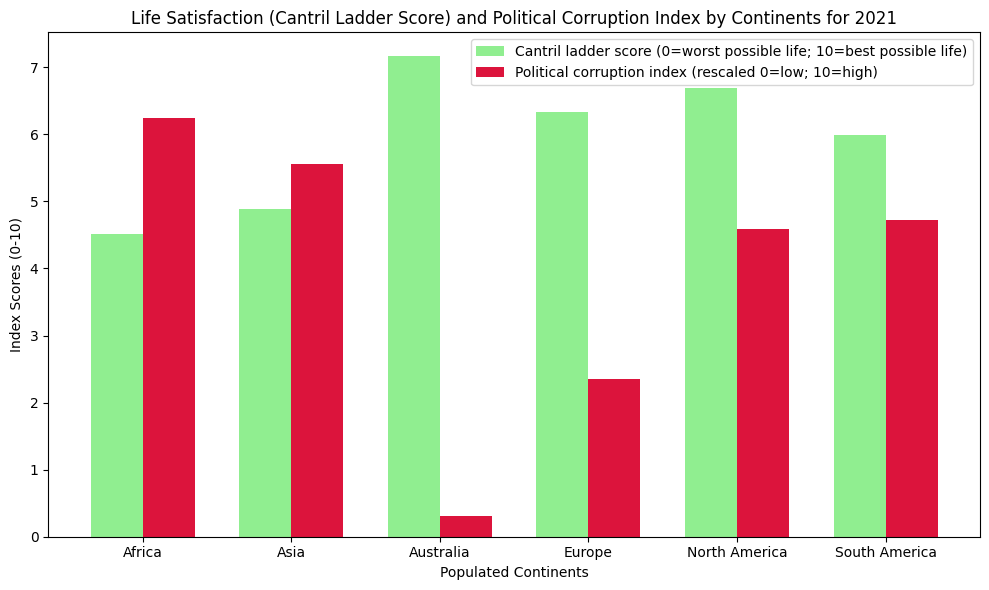

In [90]:
x = np.arange(len(continents))
width = 0.35
fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, df_life_satisfaction_continents['Cantril ladder score'], width, label='Cantril ladder score (0=worst possible life; 10=best possible life)', color='lightgreen')
bars2 = ax.bar(x + width/2, df_political_corruption_continents['Political corruption index'] * 10, width, label='Political corruption index (rescaled 0=low; 10=high)', color='crimson')

ax.set_xlabel('Populated Continents')
ax.set_ylabel('Index Scores (0-10)')
ax.set_title('Life Satisfaction (Cantril Ladder Score) and Political Corruption Index by Continents for 2021')
ax.set_xticks(x)
ax.set_xticklabels(continents)
ax.legend()
plt.tight_layout()
plt.show()

### Task 2: Investigate whether clustering can be used to identify volcanoes that lie on the same tectonic plate boundary